# Morphology: Paths and Subtrees (Notebook)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Poirazi-Lab/DendroTweaks/blob/main/docs/source/tutorials/Morphology_paths_and_subtrees.ipynb)

In the previous tutorial we learned how to build a morphological representation of a neuron as `PointTree`, `SectionTree` and `SegmentTree`. This tutorial will guide you through specifying paths along the tree, calculating path distances and modifying the topology of a cell.

## Setup

In [ ]:
!pip install dendrotweaks

If you are using Google Colab, you might also need to restart the session as the installation downgraded some packages (numpy). You can do it manually or programmatically as shown below:

In [2]:
# import os
# os.kill(os.getpid(), 9)

Let's begin by importing the standard libraries and the dendrotweaks library.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
import dendrotweaks as dd
dd.__version__

'0.5.1'

In [5]:
dd.apply_dark_theme() # Set the theme for the plots

In [6]:
os.makedirs('examples', exist_ok=True)
if not os.listdir('examples/'):
    print("Downloading example data...")
    dd.download_example_data('examples')

## Load morphology

Let's load a model:

In [7]:
path_to_model = os.path.join('examples', 'Poirazi_2003')
print(f'Path to model: {path_to_model}')

Path to model: examples/Poirazi_2003


In [8]:
model = dd.Model(path_to_model)

In [9]:
model.list_morphologies()

['original', 'main']

In [10]:
model.load_morphology(file_name='main')

Sorted PointTree(root=Point(idx=0), num_nodes=5077).
Extended 178 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=5255).


In [11]:
model.domains

{'axon': <Domain(axon, 2, #F0E442, 13 sections)>,
 'basal': <Domain(basal, 31, #31A354, 48 sections)>,
 'oblique': <Domain(oblique, 43, #8C564B, 72 sections)>,
 'soma': <Domain(soma, 1, #E69F00, 1 sections)>,
 'trunk': <Domain(trunk, 41, #56B4E9, 25 sections)>,
 'tuft': <Domain(tuft, 42, #A55194, 22 sections)>}

We can visualize the `SectionTree` we will be working with using the following method.

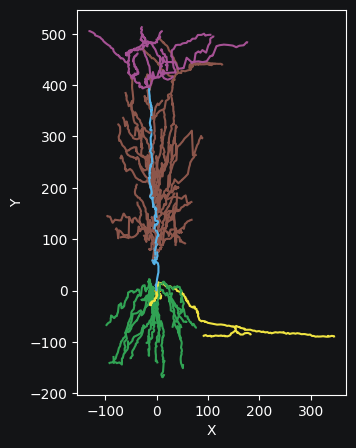

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
model.sec_tree.plot(ax, 
                    show_points=False,
                    show_lines=True,
                    annotate=False)

## Paths

Next we will learn how to obtain paths between any two nodes and how to compute the path distance between those nodes. We will use the `SectionTree` and select two arbitrary `Sections` with indices 166 and 179 (nodes of the `SectionTree`)

We can find the common ancestor of these two sections using the `find_common_ancestor` method:

In [13]:
sec1 = model.sec_tree[166]
sec2 = model.sec_tree[179]
sec3 = sec1.find_common_ancestor(sec2)
print(sec3)

NeuronSection(idx=158)


The least common ancestor of sections 166 and 179 is section 158.

Let's use the tree plot from the above and pass a list of sections to the `highlight_sections` parameter. The selected sections will be shown in red.

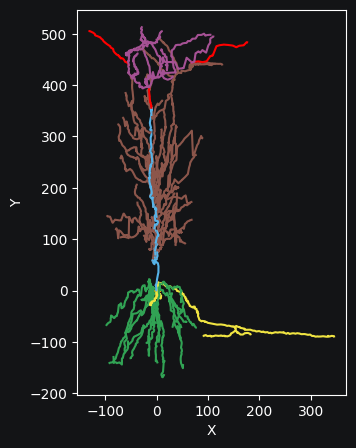

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
model.sec_tree.plot(
    ax = ax,
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=[sec1, sec2, sec3]
)

### Path to ancestor

We can also find and visualize the entire path from a section to the root of the tree (i.e., including all the ancestors of a section) using the `path_to_ancestor` property without specifying the ancestor (the default ancestor is the root):

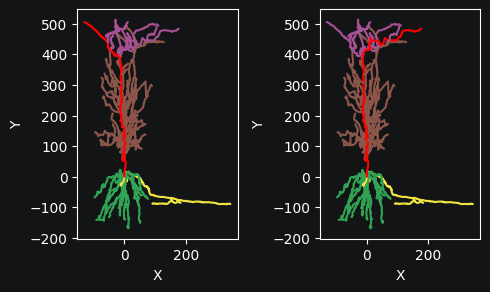

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(5, 5))
model.sec_tree.plot(
    ax=axes[0],
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=sec1.path_to_ancestor()
)
model.sec_tree.plot(
    ax=axes[1],
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=sec2.path_to_ancestor()
)
plt.tight_layout()

We can provide a specific ancestor node to obtain a list of sections that constitute the path to that ancestor

In [16]:
sec1.path_to_ancestor(sec3)

[NeuronSection(idx=166),
 NeuronSection(idx=165),
 NeuronSection(idx=163),
 NeuronSection(idx=159),
 NeuronSection(idx=158)]

There are also two optional parameters `include_ancestor` and `include_self` that allow us to control whether we want to include the edge nodes of the path. Note that in contrast to the previous list the sections 166 and 158 are not included.

In [17]:
sec1.path_to_ancestor(sec3, include_ancestor=False, include_self=False)

[NeuronSection(idx=165), NeuronSection(idx=163), NeuronSection(idx=159)]

Text(0.5, 1.0, 'Path excluding endpoints')

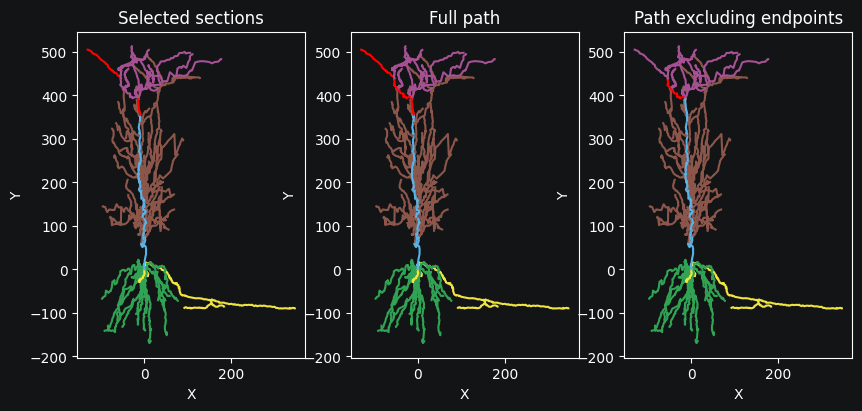

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 15))
model.sec_tree.plot(
    ax = axes[0],
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=[sec1, sec3]
)
axes[0].set_title('Selected sections')
model.sec_tree.plot(
    ax = axes[1],
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=sec1.path_to_ancestor(sec3)
)
axes[1].set_title('Full path')
model.sec_tree.plot(
    ax = axes[2],
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=sec1.path_to_ancestor(
        sec3, 
        include_self=False, 
        include_ancestor=False
    )
)
axes[2].set_title('Path excluding endpoints')

### Path between two parallel sections

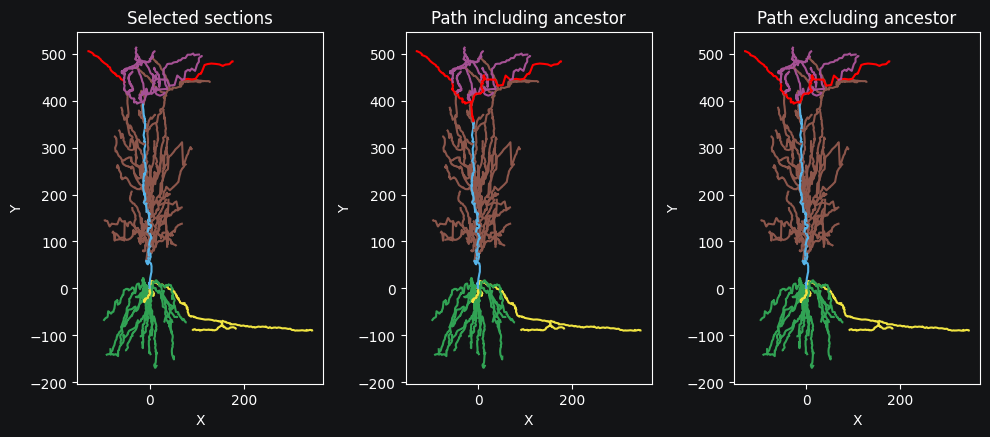

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 15))
model.sec_tree.plot(
    ax = axes[0],
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=[sec1, sec2]
)
axes[0].set_title('Selected sections')
model.sec_tree.plot(
    ax=axes[1],
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=sec1.path(sec2))
axes[1].set_title('Path including ancestor')

model.sec_tree.plot(
    ax=axes[2],
    show_points=False, 
    show_lines=True, 
    annotate=False, 
    highlight_sections=sec1.path(sec2, include_ancestor=False))
axes[2].set_title('Path excluding ancestor')
plt.tight_layout()

### Domain root

One useful property of the `Section` class is `domain_root`, 
which traverses the tree towards the root and returns the 
shallowest (closest to tree root) ancestor of a given section 
that still belongs to this domain. Compare:

In [20]:
print(f"Section {sec1.idx}               belongs to '{sec1.domain_name}'")
print(f"Domain root {sec1.domain_root.idx}           belongs to '{sec1.domain_root.domain_name}'")
print(f"Domain root parent {sec1.domain_root.parent.idx}    belongs to '{sec1.domain_root.parent.domain_name}'")

Section 166               belongs to 'tuft'
Domain root 159           belongs to 'tuft'
Domain root parent 158    belongs to 'trunk'


In [21]:
sec1.path_to_ancestor(sec1.domain_root.parent)

[NeuronSection(idx=166),
 NeuronSection(idx=165),
 NeuronSection(idx=163),
 NeuronSection(idx=159),
 NeuronSection(idx=158)]

### Path distance

To calculate the path distance from one section to another we can sum up the lengths of all the sections on the path between them

In [22]:
path = sec1.path_to_ancestor(sec3, include_ancestor=False, include_self=False)
sum(sec.length for sec in path)

106.72683759142204

However, there is a more convenient way to do this. We can use the `path_distance` method. 

In [23]:
sec1.path_distance(other=sec3)

106.72683759142204

This method computes the distance from the beginning of `sec1` to the end of `sec3`. This rule applies when we consider a section and it's ancestor, i.e., we follow the path towards the root. 

However, note that if we were to take the distance between `sec1` and `sec2` we would calculate the distance from the beginning of `sec1` to the *beginning* of `sec2`, since these sections are in parallel subtrees.

Moreover, the `path_distance` method allows us to specify the relative positions along the sections (0 = start, 1 = end). For example, we can calculate the path distance between the centers of two sections:

In [24]:
sec1.path_distance(
    other=sec3, 
    relative_position=0.5, 
    relative_position_other=0.5
)

194.36334919196062

This is equivalent to:

In [25]:
0.5 * sec1.length + sec1.path_distance(other=sec3) + 0.5 * sec3.length

194.36334919196062

## Subtrees

In addition to paths between nodes, we can access node subtrees. We can do it using the `subtree` property.

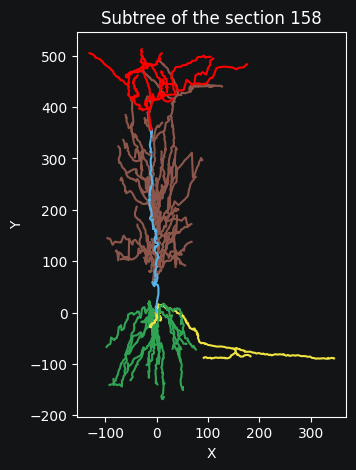

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))
model.sec_tree.plot(
    ax = ax,
    show_points=False, 
    show_lines=True, 
    annotate=False,
    highlight_sections=sec3.subtree
)
ax.set_title(f'Subtree of the section {sec3.idx}');

We can further modify and rearrange the subtrees. For example, we can remove a subtree. This method is used, for example, in morphology reduction pipelines when a subtree is getting merged into a single equivalent section.

<div style="
  border-left: 6px solid #f39c12;
  background-color: #2a2514;
  color: lightgray;
  padding: 12px 16px;
  margin: 16px 0;
  border-radius: 4px;
  width: 95%;
  font-family: 'Segoe UI', sans-serif;
">
  <div style="font-weight: bold; color: #f1c40f; margin-bottom: 4px;">Warning</div>
    You can also reposition a subtree to a new location using the <code>reposition_subtree</code> method. For example, to detach a branch from its parent and attach it to another branch. This can be useful for removing reconstruction artifacts. However, this must be done on the <code>PointTree</code> before creating a <code>SectionTree</code> or <code>SegmentTree</code> (see the previous tutorial).
</div>


In [26]:
model.sec_tree.remove_subtree(sec3)

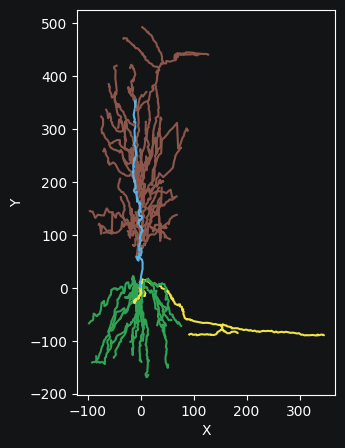

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
model.sec_tree.plot(
    ax = ax,
    show_points=False, 
    show_lines=True, 
    annotate=False
)